In [1]:
import pandas as pd
import numpy as np
# import torch
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
plt.style.use('seaborn')
from tqdm import tqdm

### Price Data vs SimilarWeb Web Traffic

In [95]:
consensus_df = pd.read_csv('ESTIMATESACTUALS.csv')

In [96]:
consensus_df = consensus_df.loc[consensus_df['Instrument']=='EBAY.O']
consensus_df['Date'] = pd.to_datetime(consensus_df['Date'])

In [98]:
consensus_df.set_index('Date', inplace=True)

In [102]:
consensus_df.sort_index(inplace=True)

In [101]:
consensus_df[['Mean']]

,Mean
Date,
2019-07-24 00:00:00+00:00,1.082637e+10
2019-07-18 00:00:00+00:00,1.084034e+10
2019-07-17 00:00:00+00:00,1.090162e+10
2019-07-16 00:00:00+00:00,1.092368e+10
2019-07-15 00:00:00+00:00,1.092436e+10
2019-07-12 00:00:00+00:00,1.092710e+10
2019-07-11 00:00:00+00:00,1.092865e+10
2019-06-03 00:00:00+00:00,1.092953e+10
2019-05-22 00:00:00+00:00,1.093125e+10


In [91]:
consensus_df.sort_index(inplace=True)

912      33
913      35
914      34
915      34
916      34
917      34
918      34
919      34
920      33
921      32
922      31
923      33
924      33
925      33
926      33
927      33
928      33
929      33
930      33
931      33
932      33
933      33
934      32
935      33
936      32
937      33
938      32
939      32
940      32
941      32
         ..
21887     6
21888     5
21889     2
21890    10
21891    11
21892    10
21893     9
21894     8
21895     9
21896     8
21897     5
21898     5
21899     6
21900     5
21901     4
21902     3
21903     3
21904     3
21905     4
21906     3
21907     3
21908     2
21909     1
21910     8
21911     8
21912     8
21913     9
21914     8
21915     8
21916     9
Name: Number of Included Estimates, Length: 1383, dtype: int64

In [4]:
df=pd.read_csv("similarweb-webtraffic.csv")
df.head()
yr = df['year'] 
df['year'] = np.where(yr <= 20, 2000 + yr, 1900 + yr)
df['date'] = pd.to_datetime(df[['year', 'month', 'day']],format='%Y-%m-%d') 
df.head()

,site,country,year,month,day,desktop_visits,desktop_pages_per_visit,desktop_visit_duration,desktop_bounce_rate,desktop_page_views,...,mobile_pages_per_visit,mobile_visit_duration,mobile_bounce_rate,mobile_page_views,total_visits,total_pages_per_visits,total_visit_duration,total_bounce_rate,total_page_views,date
0,foxbusiness.com,999.0,2017,8,26,116450.0,2.74,430.0,0.5444,319138.0,...,1.93,93.0,0.6450,282507.0,263032.0,2.29,242.0,0.6005,601645.0,2017-08-26
1,papajohns.pl,NaN,2017,8,31,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,2017-08-31
2,oxo.ua,999.0,2017,8,8,4949.0,6.96,417.0,0.3669,34451.0,...,1.42,0.0,0.4526,1403.0,5935.0,6.04,348.0,0.3811,35854.0,2017-08-08
3,workday.com,356.0,2017,8,22,2061.0,38.43,2486.0,0.1290,79221.0,...,2.18,63.0,0.7409,148.0,2129.0,37.27,2409.0,0.1485,79369.0,2017-08-22
4,canadagoose.com,250.0,2017,8,16,248.0,1.00,0.0,1.0000,248.0,...,3.59,198.0,0.2422,2342.0,900.0,2.88,143.0,0.4509,2589.0,2017-08-16


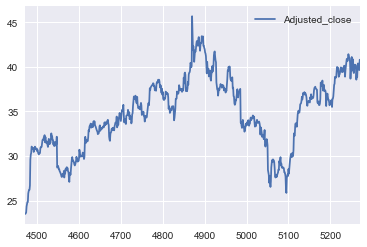

            Date  Adjusted_close
5267  2019-08-30           40.29
5268  2019-09-03           39.74
5269  2019-09-04           39.64
5270  2019-09-05           40.80
5271      268797             NaN             Date  Adjusted_close
4472  2016-07-05         23.4983
4473  2016-07-06         23.5674
4474  2016-07-07         23.6664
4475  2016-07-08         24.3388
4476  2016-07-11         24.5861


In [43]:
df_price = pd.read_csv('EBAY.csv')
df_price.head()
df_price=df_price[df_price['Date']>'2016-07-01'][['Date','Adjusted_close']]
df_price.plot()
plt.show()
print(df_price.tail(),df_price.head())

In [6]:
df_tickers=pd.read_excel("SimilarWeb_Mapped_Tickers.xlsx")
df_tickers.head()

,Company,Ticker,Domain,Unnamed: 3
0,AMERICAN AIRLINES GROUP INC,AAL US,aa.com,NaN
1,AMERICAN AIRLINES GROUP INC,AAL US,americanairlines.de,NaN
2,AMERICAN AIRLINES GROUP INC,AAL US,americanairlines.es,NaN
3,AMERICAN AIRLINES GROUP INC,AAL US,americanairlines.com,NaN
4,AMERICAN AIRLINES GROUP INC,AAL US,americanairlines.fr,NaN


In [7]:
company_name = "EBAY"
df_tickers.Company.str.contains(company_name)
list_sites=[]
for items in df_tickers[df_tickers.Company.str.contains(company_name,na=False)]['Domain']:
    list_sites.append(items)

In [10]:
list_sites[:5]

['2dehands.be',
 '2ememain.be',
 'alamaula.com',
 'automobile.fr',
 'automobile.de']

In [16]:
sites = '2dehands.be'
df_site=df[df.site.str.contains(sites,na=False)][['site','date','total_page_views']]
df_site=df_site.sort_values(['site','date'])#(['site','year','month','day'])
df_sum=df_site.groupby(['site','date']).sum()

In [27]:
df_sum = df_sum.reset_index().set_index('date')

In [34]:
print(df.shape)
new_df = df.loc[df['site'].isin(list_sites)]
print(new_df.shape)

(8070534, 21)
(177239, 21)


In [39]:
df2 = new_df[['date', 'total_page_views']].set_index('date')

In [ ]:
df2 = df2.resample('1D').sum()

In [60]:
df2.index.dtype

dtype('<M8[ns]')

In [68]:
df_price.head()

,Date,Adjusted_close
0,2016-07-05,23.4983
1,2016-07-06,23.5674
2,2016-07-07,23.6664
3,2016-07-08,24.3388
4,2016-07-11,24.5861


In [73]:
pd.to_datetime(df_price['Date'], format='%Y-%m-%d', errors='coerce')

0     2016-07-05
1     2016-07-06
2     2016-07-07
3     2016-07-08
4     2016-07-11
5     2016-07-12
6     2016-07-13
7     2016-07-14
8     2016-07-15
9     2016-07-18
10    2016-07-19
11    2016-07-20
12    2016-07-21
13    2016-07-22
14    2016-07-25
15    2016-07-26
16    2016-07-27
17    2016-07-28
18    2016-07-29
19    2016-08-01
20    2016-08-02
21    2016-08-03
22    2016-08-04
23    2016-08-05
24    2016-08-08
25    2016-08-09
26    2016-08-10
27    2016-08-11
28    2016-08-12
29    2016-08-15
         ...    
770   2019-07-26
771   2019-07-29
772   2019-07-30
773   2019-07-31
774   2019-08-01
775   2019-08-02
776   2019-08-05
777   2019-08-06
778   2019-08-07
779   2019-08-08
780   2019-08-09
781   2019-08-12
782   2019-08-13
783   2019-08-14
784   2019-08-15
785   2019-08-16
786   2019-08-19
787   2019-08-20
788   2019-08-21
789   2019-08-22
790   2019-08-23
791   2019-08-26
792   2019-08-27
793   2019-08-28
794   2019-08-29
795   2019-08-30
796   2019-09-03
797   2019-09-

In [74]:
df_price['Date'] = pd.to_datetime(df_price['Date'], format='%Y-%m-%d', errors='coerce')

In [76]:
df_price.set_index('Date', inplace=True)

In [64]:
df_price.reset_index(inplace=True)
df_price['Date'] = pd.to_datetime(df_price['Date'], format='%Y-%m-%d', errors='coerce')

ValueError: month must be in 1..12

In [79]:
df3 =df2.join(df_price)
df3.fillna(method='ffill', inplace=True)

In [81]:
df3.head()

,total_page_views,Adjusted_close
date,,
2016-07-01,1.105985e+09,NaN
2016-07-02,1.141334e+09,NaN
2016-07-03,1.229590e+09,NaN
2016-07-04,1.240688e+09,NaN
2016-07-05,1.184691e+09,23.4983


In [108]:
consensus_df.reset_index(inplace=True)

In [114]:
consensus_df.head()
consensus_df['Date'] = consensus_df['Date'].dt.date

,Date,Instrument,Number of Included Estimates,Mean,High,Low,Date Actual,Actual Value,Estimate
0,2013-07-15,EBAY.O,9,0.000000e+00,0.000000e+00,0.000000e+00,2014-01-22T16:15:00Z,0.000000e+00,DPS
1,2013-07-22,EBAY.O,18,4.073406e+09,4.537100e+09,3.108000e+09,2014-01-22T16:15:00Z,4.414000e+09,PTP
2,2013-07-29,EBAY.O,39,1.616870e+10,1.635320e+10,1.608000e+10,2014-01-22T16:15:00Z,1.604700e+10,REV
3,2013-07-29,EBAY.O,33,3.567008e+09,3.633900e+09,3.542573e+09,2014-01-22T16:15:00Z,3.556000e+09,NPR
4,2013-08-01,EBAY.O,40,2.711550e+00,2.750000e+00,2.700000e+00,2014-01-22T16:15:00Z,2.710000e+00,EPS


In [115]:
consensus_df=consensus_df[consensus_df['Date']>datetime.date(2016,7,1)][['Date','Mean']]

In [117]:
consensus_df.set_index('Date', inplace=True)

In [121]:
df4 = df3.join(consensus_df)

In [123]:
df4.fillna(method='ffill', inplace=True)

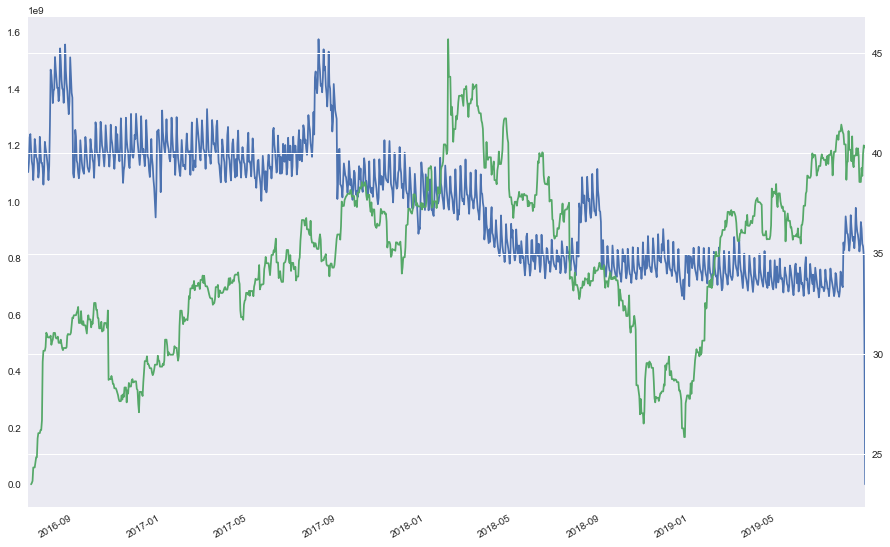

In [125]:
df4['total_page_views'].plot(figsize=[15,10])
df4['Adjusted_close'].plot(figsize=[15,10], secondary_y=True)
# df4['Mean'].plot(figsize=[15,10], secondary_y=True)

AttributeError: 'Line2D' object has no property 'secondary_y'

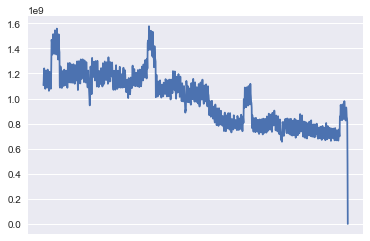

In [54]:
plt.plot(df2)
plt.plot(df_price, secondary_y=True)

In [47]:
df_price.set_index('Date', inplace=True)

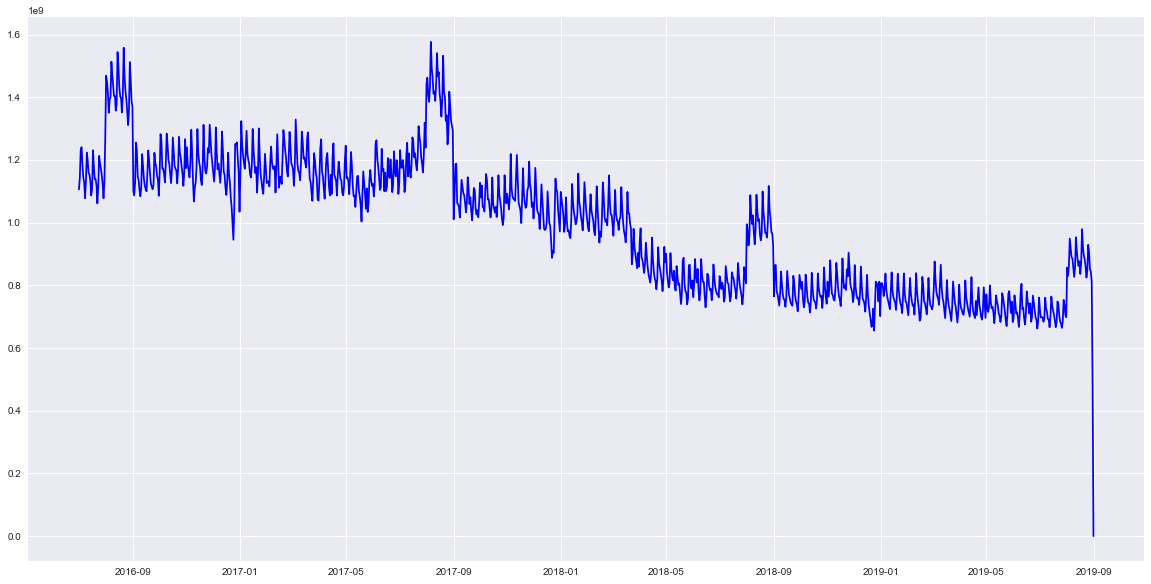

In [52]:
    fig = plt.figure(figsize=[20,10])
    ax1 = fig.add_subplot(1,1,1)
    ax1.plot(df2,'b')
#     ax1.plot(df_price,'r')
    plt.show()
    
    
#     plt.plot(df_sum['total_page_views'],'b')
#     df_sum.total_page_views.plot()
#     df_price.plot()
#     plt.plot(df_price,'r')
#     plt.show()

In [32]:
new_df = pd.DataFrame()
for sites in tqdm(list_sites):
    df_site=df[df.site.str.contains(sites,na=False)][['site','date','total_page_views']]
    df_site=df_site.sort_values(['site','date'])#(['site','year','month','day'])
#     df_sum=df_site.groupby(['site','year','month','day']).sum()
    df_sum=df_site.groupby(['site','date']).sum()
    df_sum = df_sum.reset_index().set_index('date')
    new_df.append(df_sum)
#     df_sum['date']=pd.join([df_sum['year'],df_sum['month'],df_sum['day']],axis=1)
#     df_sum['date'] = datetime.date(df_sum['year'],df_sum['month'],df_sum['day'])
#     fig = plt.figure()
#     ax1 = fig.add_subplot(2,1,1)
#     ax2 = fig.add_subplot(2,1,2)
#     ax1.plot(df_sum.total_page_views,'b')
#     ax2.plot(df_price,'r')
# #     plt.plot(df_sum['total_page_views'],'b')
# #     df_sum.total_page_views.plot()
# #     df_price.plot()
# #     plt.plot(df_price,'r')
#     plt.show()


  3%|█▏                                        | 3/108 [00:18<10:53,  6.22s/it]

KeyboardInterrupt: 

In [ ]:
for sites in list_sites:
    df_site=df[df.site.str.contains(sites,na=False)][['site','date','total_page_views']]#[['site','year','month','day','total_page_views']]
    df_site=df_site.sort_values(['site','date'])#''year','month','day'])
    df_sum=df_site.groupby(['site','date']).sum()#'year','month','day']).sum()
    print(df_sum.head())
    df_diff=df_sum[1:]-df_sum[:-1]
    print(df_diff.head())
#     df_diff.plot()
#     plt.show()